In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The dataset for 

In [2]:
df = pd.read_excel("C:\\Users\\ADMIN\\Downloads\\Data\\Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.duplicated().sum()

5268

In [6]:
df[['InvoiceNo', 'StockCode']].duplicated().sum()

10684

In [7]:
df[df[['CustomerID', 'InvoiceNo', 'StockCode']].duplicated() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [8]:
df[((df['CustomerID'] == 17908.0) & (df['InvoiceNo'] == 536409) & (df['StockCode'] == '90199C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom


In [9]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [10]:
df[df['Quantity'] < 0].InvoiceNo.str.startswith('C').value_counts(dropna = False)

True    9288
NaN     1336
Name: InvoiceNo, dtype: int64

<Axes: >

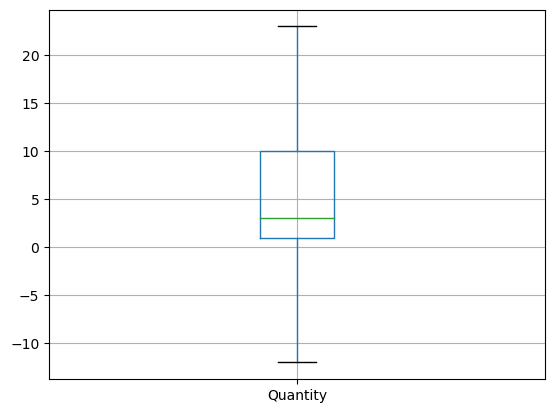

In [11]:
df.boxplot('Quantity', showfliers = False)

BASIC DATA CLEANING

In [12]:
# Drop duplicates
df = df.drop_duplicates(subset = ['InvoiceNo', 'StockCode', 'Quantity'])

In [13]:
# Drop records with Quantity < 0
df = df.drop(df.loc[df["Quantity"] < 0].index)

In [14]:
# Drop records with null CustomerID
df.drop(df.loc[df["CustomerID"].isnull()].index, inplace = True)

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['order_year_month'] = df['InvoiceDate'].dt.strftime('%Y-%m')

Text(0, 0.5, 'Number of Orders')

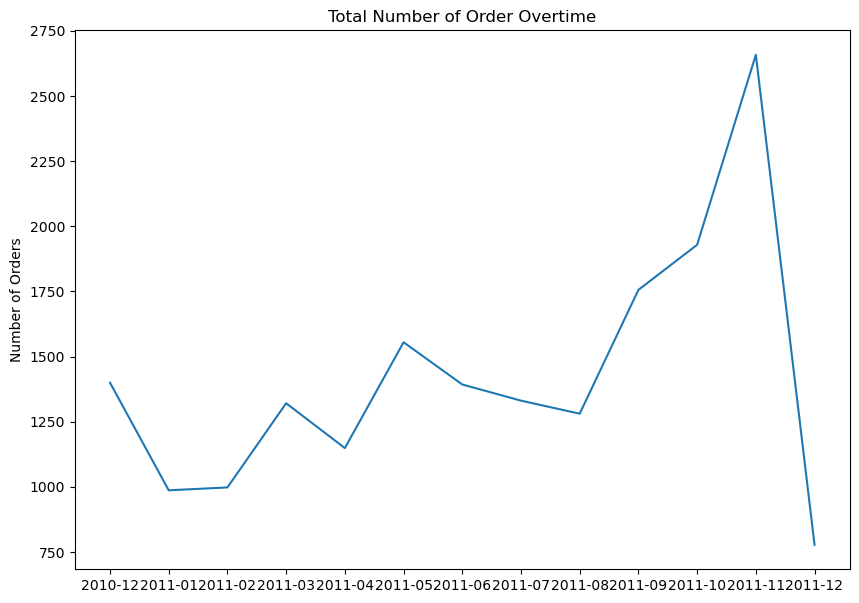

In [16]:
# Visualize the number of orders received by month
%matplotlib inline

df.groupby('order_year_month').InvoiceNo.nunique()

plt.figure(figsize = (10, 7))
plt.plot(df.groupby('order_year_month').InvoiceNo.nunique())
plt.title('Total Number of Order Overtime')
plt.ylabel('Number of Orders')

### Time Series Trend Analysis

In [17]:
invoice_dates = df.loc[df['order_year_month'] >= '2011-12', 'InvoiceDate']
print('Min date: {x}\nMax date: {y}'.format(x = invoice_dates.min(), y = invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [18]:
# Filter out incomplete df for December 2011
df = df.loc[df['order_year_month'] < '2011-12']

<Axes: title={'center': 'Number of Orders by Month'}, xlabel='order_year_month', ylabel='Number of Orders'>

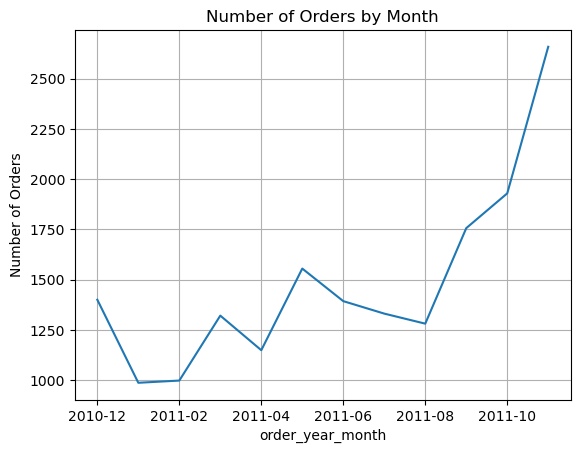

In [19]:
df.groupby('order_year_month')['InvoiceNo'].nunique().plot(
    kind = 'line', grid = True, xlabel = 'order_year_month', 
    ylabel = 'Number of Orders', title = 'Number of Orders by Month')

Calculate monthly revenue data

<Axes: title={'center': 'Monthly Sales Revenue'}, xlabel='order_year_month', ylabel='Sales Revenue'>

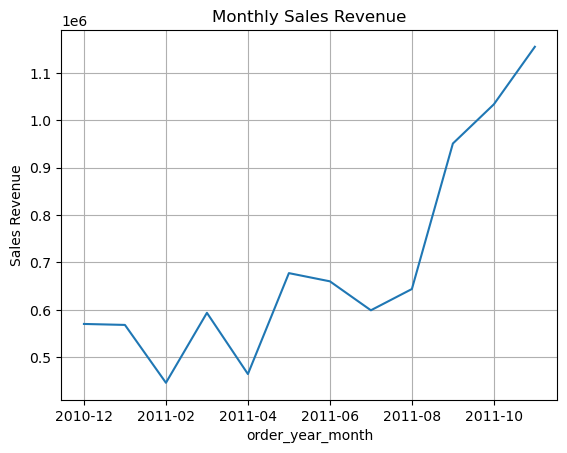

In [20]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

monthly_sales = df.groupby('order_year_month')['Sales'].agg('sum')

monthly_sales.plot(
    kind = 'line', grid = True, xlabel = 'order_year_month', 
    ylabel = 'Sales Revenue', title = 'Monthly Sales Revenue')

# The number of orders reach the peak in November 2011. 

In [21]:
grouped_df = df.groupby(['order_year_month', 'CustomerID'])['InvoiceNo'].agg('nunique').reset_index()

repeat_customer_df = grouped_df.loc[grouped_df['InvoiceNo'] >= 2].groupby('order_year_month')['CustomerID'].agg('count').reset_index()
repeat_customer_df.columns = ['OrderDate', 'Number of Repeat Customers']

repeat_customer_df

,OrderDate,Number of Repeat Customers
0,2010-12,263
1,2011-01,149
2,2011-02,150
3,2011-03,201
4,2011-04,168
5,2011-05,279
6,2011-06,219
7,2011-07,227
8,2011-08,196
9,2011-09,271


In [22]:
monthly_customers = df.groupby('order_year_month')['CustomerID'].agg('nunique').reset_index()
monthly_customers.columns = ['OrderDate', 'Number of Customers']

repeat_customer_df = repeat_customer_df.merge(monthly_customers, on = 'OrderDate', how = 'left')
repeat_customer_df['repeat_customer_pct'] = repeat_customer_df['Number of Repeat Customers'] / repeat_customer_df['Number of Customers'] * 100

In [23]:
repeat_customer_df

,OrderDate,Number of Repeat Customers,Number of Customers,repeat_customer_pct
0,2010-12,263,885,29.717514
1,2011-01,149,741,20.107962
2,2011-02,150,758,19.788918
3,2011-03,201,974,20.636550
4,2011-04,168,856,19.626168
5,2011-05,279,1056,26.420455
6,2011-06,219,991,22.098890
7,2011-07,227,949,23.919916
8,2011-08,196,935,20.962567
9,2011-09,271,1266,21.406003


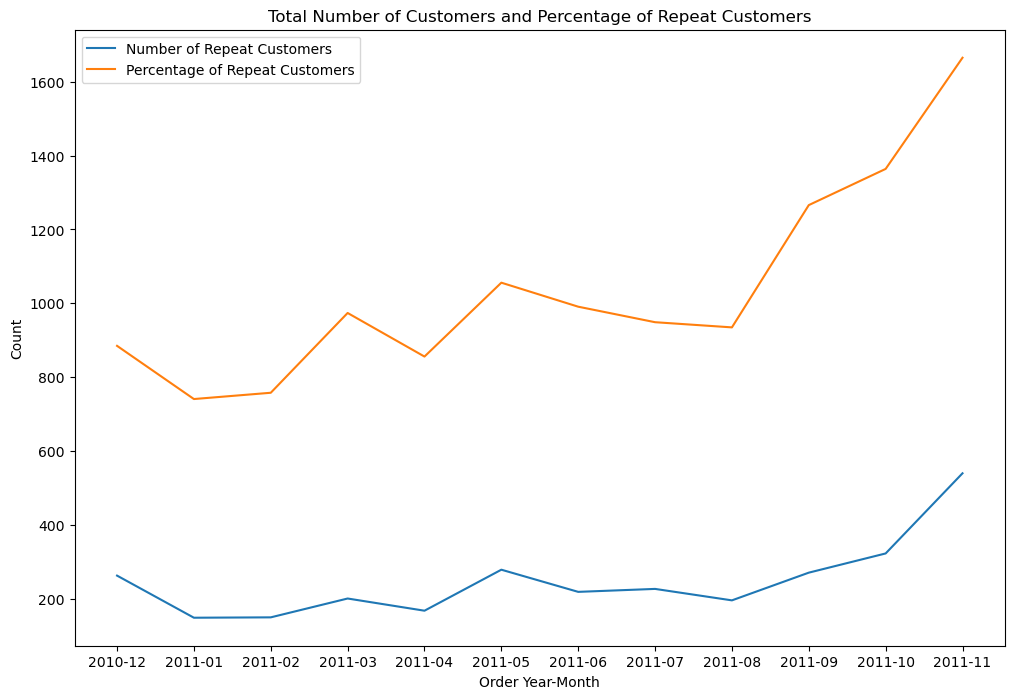

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(repeat_customer_df['OrderDate'], repeat_customer_df['Number of Repeat Customers'], label = 'Number of Repeat Customers')
ax.plot(repeat_customer_df['OrderDate'], repeat_customer_df['Number of Customers'], label = 'Percentage of Repeat Customers')

ax.set_xlabel('Order Year-Month')
ax.set_ylabel('Count')
ax.set_title('Total Number of Customers and Percentage of Repeat Customers')

ax.legend()

plt.show()

Analyze how much of the monthly revenue comes from these Repeat Customers

In [25]:
grouped_df = df.groupby(['order_year_month','CustomerID']).agg({'InvoiceNo':'nunique', 'Sales':'sum'}).reset_index()
total_revenue = grouped_df.groupby(['order_year_month'])['Sales'].agg('sum').reset_index()

total_revenue

,order_year_month,Sales
0,2010-12,570158.050
1,2011-01,568101.310
2,2011-02,446084.920
3,2011-03,593617.960
4,2011-04,464499.161
5,2011-05,677340.300
6,2011-06,660046.050
7,2011-07,598962.051
8,2011-08,643801.040
9,2011-09,950678.021


In [26]:
repeat_customer_df = grouped_df.loc[grouped_df['InvoiceNo'] >= 2]

grouped_revenue = repeat_customer_df.groupby('order_year_month')['Sales'].agg('sum').reset_index()

grouped_revenue = grouped_revenue.merge(total_revenue, on = 'order_year_month', how = 'left')
grouped_revenue.columns = ['order_year_month', 'repeat_revenue', 'total_revenue']
grouped_revenue['repeat_revenue_pct'] = grouped_revenue['repeat_revenue'] / grouped_revenue['total_revenue'] * 100

grouped_revenue

,order_year_month,repeat_revenue,total_revenue,repeat_revenue_pct
0,2010-12,357849.24,570158.050,62.763165
1,2011-01,218953.76,568101.310,38.541323
2,2011-02,189736.82,446084.920,42.533789
3,2011-03,265870.64,593617.960,44.788173
4,2011-04,190655.38,464499.161,41.045366
5,2011-05,377475.69,677340.300,55.729105
6,2011-06,375475.61,660046.050,56.886275
7,2011-07,317018.05,598962.051,52.927902
8,2011-08,315360.14,643801.040,48.984099
9,2011-09,495938.13,950678.021,52.166782


### Trending Items Over Time

In [27]:
grouped_df = df.groupby(['order_year_month', 'StockCode'])['Quantity'].agg('sum').reset_index()

most_sold_Nov2011 = (
    df.loc[df['order_year_month'] == '2011-11']
    .groupby('StockCode')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .nlargest(5)
)

most_sold_Nov2011.index.tolist()

[84826, 23084, 22197, 22086, '85099B']

In [28]:
best_sellers = most_sold_Nov2011.index.tolist()

monthly_sales_best_sellers = df.loc[df["StockCode"].isin(best_sellers)].groupby(['order_year_month', 'StockCode'])['Quantity'].agg('sum')

monthly_sales_best_sellers        

order_year_month  StockCode
2010-12           22086         1691
                  22197         2109
                  84826          365
                  85099B        2056
2011-01           22197         1697
                  84826          480
                  85099B        2625
2011-02           22086            2
                  22197         2503
                  84826           66
                  85099B        2971
2011-03           22086           85
                  22197         2034
                  84826           60
                  85099B        4924
2011-04           22086           10
                  22197         1801
                  84826            1
                  85099B        2211
2011-05           22086           12
                  22197         6730
                  23084         1096
                  85099B        3470
2011-06           22086          337
                  22197         1989
                  23084         1621
          

Text(0.5, 1.0, 'Item Trends Over Time')

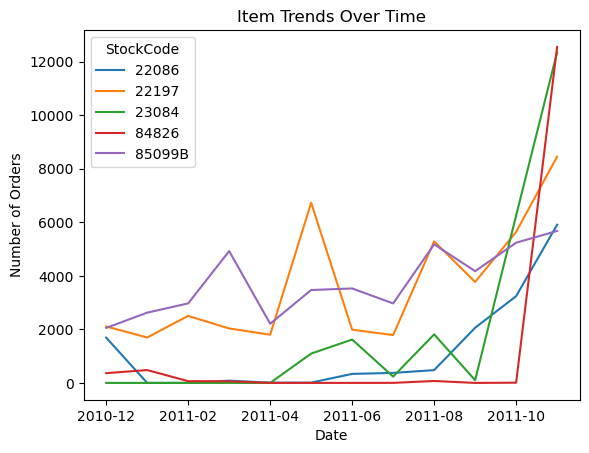

In [29]:
ax = monthly_sales_best_sellers.unstack().fillna(0).plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')
ax.set_title('Item Trends Over Time')

# The item with StockCode 84826 rocketed in October 2011.

Text(0.5, 1.0, 'Item Revenue per Month')

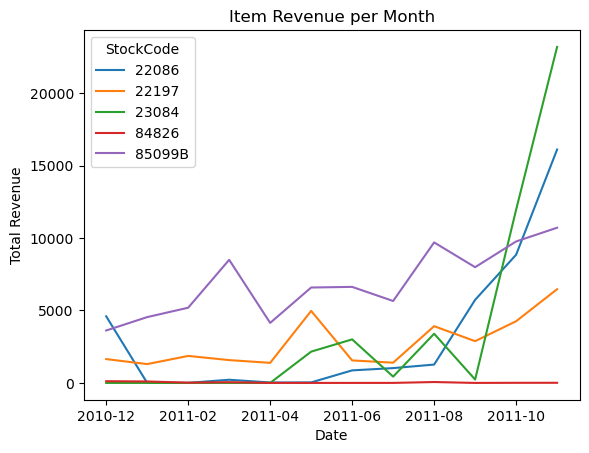

In [30]:
monthly_revenue_best_sellers = df.loc[df["StockCode"].isin(best_sellers)].groupby(['order_year_month', 'StockCode'])['Sales'].agg('sum')

ax = monthly_revenue_best_sellers.unstack().fillna(0).plot()
ax.set_xlabel('Date')
ax.set_ylabel('Total Revenue')
ax.set_title('Item Revenue per Month')

In [31]:
df[((df['StockCode'] == 84826) & (df['order_year_month'] == '2011-11'))]

#It seems like the order with InvoiceNo 578841 has been cancelled out.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_year_month,Sales
452377,575336,84826,ASSTD DESIGN 3D PAPER STICKERS,4,2011-11-09 13:58:00,0.85,14968.0,United Kingdom,2011-11,3.40
452421,575337,84826,ASSTD DESIGN 3D PAPER STICKERS,5,2011-11-09 14:11:00,0.85,17867.0,United Kingdom,2011-11,4.25
452454,575337,84826,ASSTD DESIGN 3D PAPER STICKERS,1,2011-11-09 14:11:00,0.85,17867.0,United Kingdom,2011-11,0.85
458281,575767,84826,ASSTD DESIGN 3D PAPER STICKERS,1,2011-11-11 11:11:00,0.85,17348.0,United Kingdom,2011-11,0.85
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011-11,0.00


([<matplotlib.axis.XTick at 0x25aa7161390>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

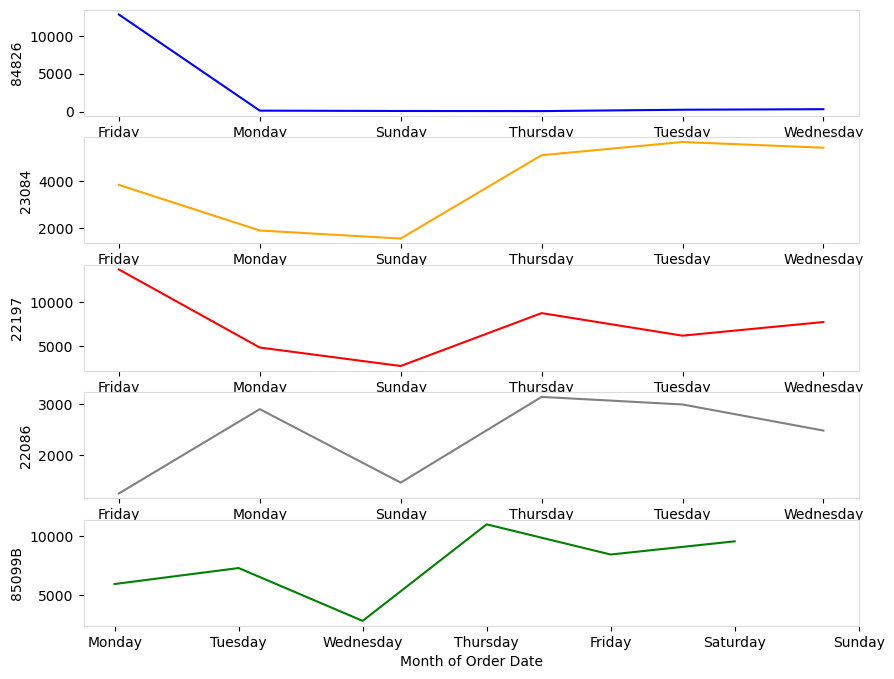

In [32]:
df['dayofweek'] = df['InvoiceDate'].dt.day_name()
fig, ax = plt.subplots(5, 1, figsize = (10, 8))
i = 0
colors = ['blue', 'orange', 'red', 'grey', 'green']

for ax1 in ax: 
    df[df['StockCode'] == best_sellers[i]].groupby('dayofweek')['Quantity'].sum().plot(kind = 'line', ax = ax1, color = colors[i])
    ax1.spines[['bottom', 'top', 'left', 'right']].set_color('#DCDCDC')
    ticks = ax1.get_xticks()
    ax1.set_xlabel('')
    ax1.set_ylabel(best_sellers[i])
    i += 1
    
ax1.set_xlabel('Month of Order Date')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Is UnitPrice changing over time?

<Axes: title={'center': 'Average UnitPrice Over Time'}, xlabel='Month', ylabel='UnitPrice'>

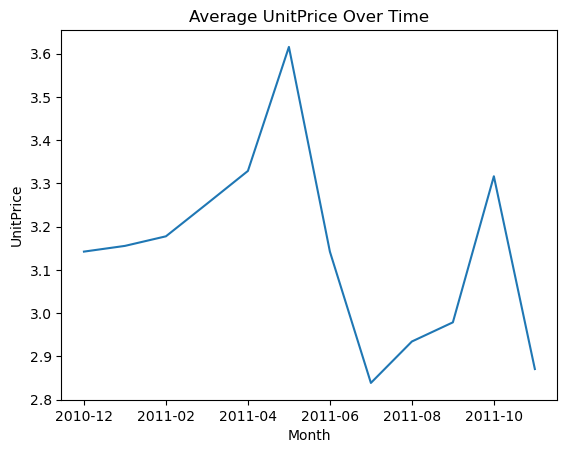

In [33]:
unit_price_over_time = df.groupby('order_year_month')['UnitPrice'].mean()

unit_price_over_time.plot(title = 'Average UnitPrice Over Time', ylabel = 'UnitPrice', xlabel = 'Month')

Does this change affect Sales and Revenues?

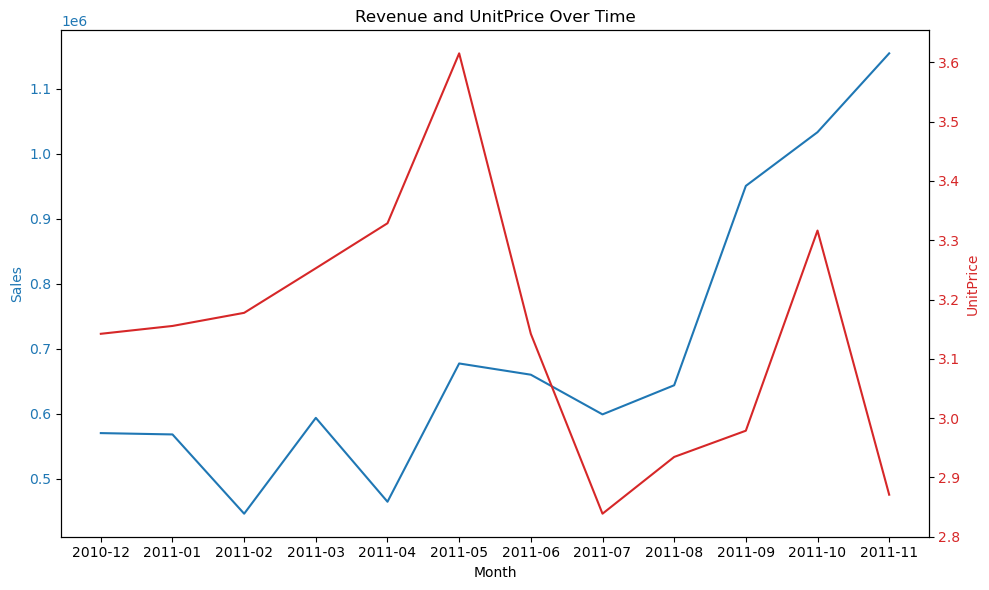

In [34]:
revenue_over_time = df.groupby('order_year_month').agg({'Sales' : 'sum', 'UnitPrice' : 'mean'})

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(revenue_over_time.index, revenue_over_time['Sales'], color = 'tab:blue', label = 'Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales', color = 'tab:blue')
ax1.tick_params(axis = 'y', labelcolor = 'tab:blue')

ax2 = ax1.twinx()
ax2.plot(revenue_over_time.index, revenue_over_time['UnitPrice'], color = 'tab:red', label = 'UnitPrice')
ax2.set_ylabel('UnitPrice', color = 'tab:red')
ax2.tick_params(axis = 'y', labelcolor = 'tab:red')

plt.title('Revenue and UnitPrice Over Time')

fig.tight_layout()
plt.show()

Do the bestsellers  change per country?

In [35]:
bestsellers_per_country = df.groupby(['Country', 'StockCode']).Sales.sum().reset_index()

bestsellers_per_country.sort_values('Sales', ascending = False).groupby('Country').head(1)

,Country,StockCode,Sales
16062,United Kingdom,22423,107649.37
8619,Germany,POST,20041.00
6965,France,POST,14716.00
10134,Netherlands,22326,7746.60
3723,EIRE,22423,7124.10
12355,Singapore,M,6164.99
9684,Japan,23084,6100.32
13434,Spain,POST,5824.00
12109,Portugal,M,4223.94
1673,Belgium,POST,4140.00


Do the sales increase on weekends and end of each month?

In [36]:
daily_sales = df.groupby(['order_year_month', 'dayofweek'])['Sales'].sum().reset_index()
daily_sales['order_year_month'] = pd.to_datetime(daily_sales['order_year_month'], format='%Y-%m')

daily_sales['year'] = daily_sales['order_year_month'].dt.year
daily_sales['month'] = daily_sales['order_year_month'].dt.month

weekend_sales = daily_sales.loc[daily_sales['dayofweek'].isin(['Saturday', 'Sunday'])]
weekday_sales = daily_sales.loc[~daily_sales['dayofweek'].isin(['Saturday', 'Sunday'])].groupby(['year', 'month'])['Sales'].agg('mean').reset_index()

weekday_sales['order_year_month'] = pd.to_datetime(weekday_sales[['year', 'month']].assign(day=1))

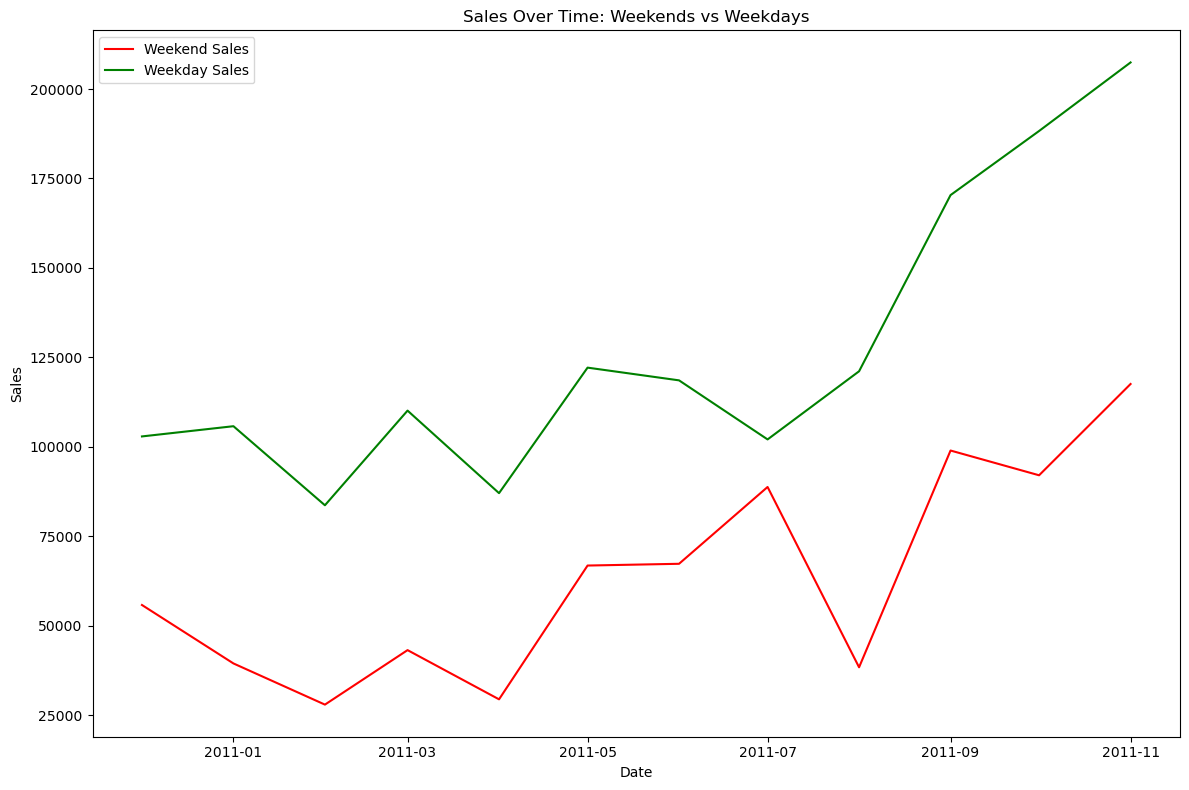

In [37]:
plt.figure(figsize=(12, 8))

plt.plot(weekend_sales['order_year_month'], weekend_sales['Sales'], label = 'Weekend Sales', color = 'red')
plt.plot(weekday_sales['order_year_month'], weekday_sales['Sales'], label = 'Weekday Sales', color = 'green')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time: Weekends vs Weekdays')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
df['is_month_end'] = df['InvoiceDate'].dt.is_month_end

end_of_month_sales = df[df['is_month_end']].groupby('order_year_month')['Sales'].sum().reset_index()
non_end_of_month_sales = df[~df['is_month_end']].groupby('order_year_month')['Sales'].mean().reset_index()

sales_data = pd.merge(end_of_month_sales, non_end_of_month_sales, on = 'order_year_month', how = 'outer', suffixes=('_end_of_month', '_non_end_of_month')).fillna(0)

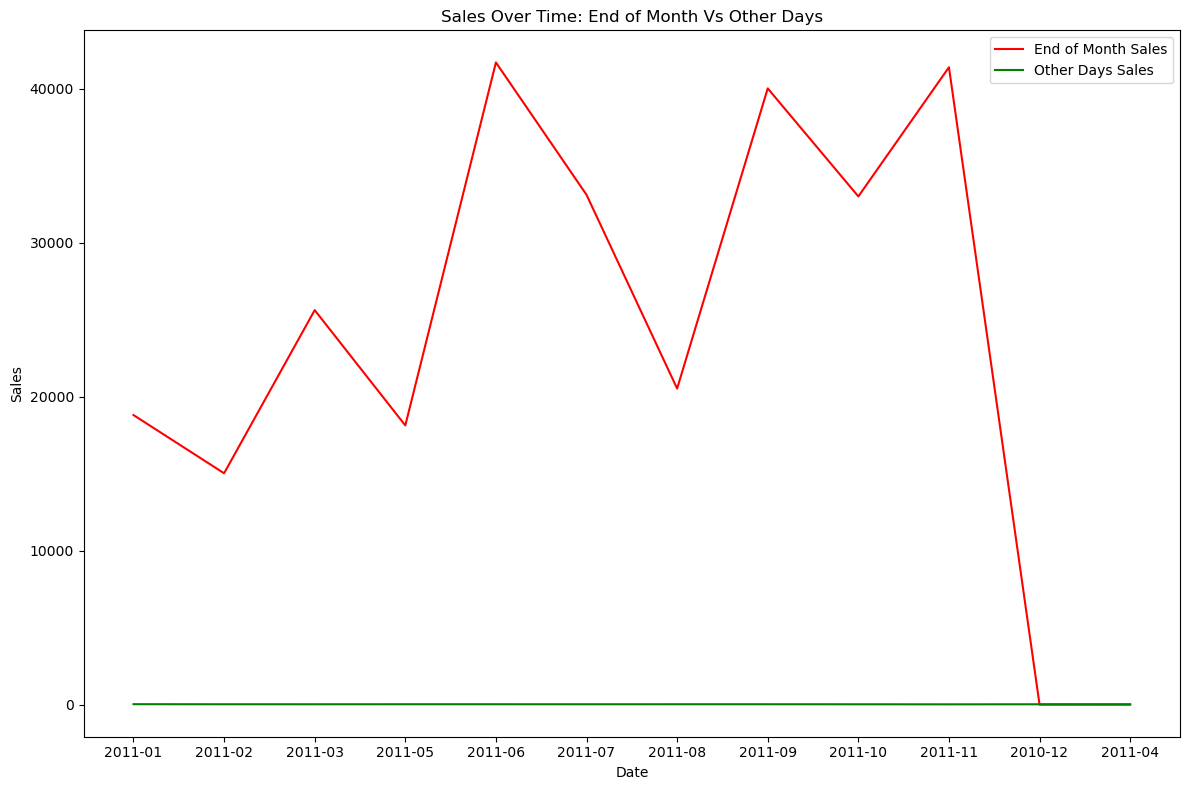

In [39]:
plt.figure(figsize=(12, 8))

plt.plot(sales_data['order_year_month'], sales_data['Sales_end_of_month'], label = 'End of Month Sales', color = 'red')
plt.plot(sales_data['order_year_month'], sales_data['Sales_non_end_of_month'], label = 'Other Days Sales', color = 'green')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time: End of Month Vs Other Days')
plt.legend()

plt.tight_layout()
plt.show()

## RFM Analysis

In [40]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_year_month,Sales,dayofweek,is_month_end
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,Wednesday,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,Wednesday,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,Wednesday,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,Wednesday,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,Wednesday,False
...,...,...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,2011-11,5.00,Wednesday,True
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,2011-11,11.90,Wednesday,True
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,2011-11,12.48,Wednesday,True
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,2011-11,7.95,Wednesday,True


In [41]:
# Calculate Recency, Frequency, and Monetary values for each customer. Store the result in a dataframe named the customer_df

customer_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'nunique',
    'Sales': 'sum'
}).reset_index()

customer_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

customer_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,316,1,77183.60
1,12347.0,30,6,4085.18
2,12348.0,66,4,1797.24
3,12349.0,9,1,1757.55
4,12350.0,301,1,334.40
...,...,...,...,...
4293,18280.0,268,1,180.60
4294,18281.0,171,1,80.82
4295,18282.0,117,1,100.21
4296,18283.0,0,15,1837.53


In [42]:
customer_df = pd.DataFrame()
customer_df['CustomerID'] = df['CustomerID'].unique()
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

In [43]:
frequency_df = df.groupby('CustomerID').agg({'InvoiceNo':'nunique'}).reset_index()
monetary_df = df.groupby('CustomerID').agg({'TotalRevenue':'sum'}).reset_index()
recency_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days}).reset_index()

In [44]:
customer_df = customer_df.merge(frequency_df, on='CustomerID', how='left')
customer_df = customer_df.merge(monetary_df, on='CustomerID', how='left')
customer_df = customer_df.merge(recency_df, on='CustomerID', how='left')
customer_df.columns=['CustomerID', 'Frequency', 'Monetary', 'Recency']

In [45]:
customer_df

,CustomerID,Frequency,Monetary,Recency
0,17850.0,34,5391.21,363
1,13047.0,10,3237.54,22
2,12583.0,14,6586.61,9
3,13748.0,5,948.25,86
4,15100.0,3,876.00,324
...,...,...,...,...
4293,18058.0,1,170.16,0
4294,12953.0,1,329.85,0
4295,12966.0,1,160.18,0
4296,15060.0,3,277.64,0


In [46]:
customer_df['r_quantile'] = pd.qcut(customer_df['Recency'], q=4, labels = [4, 3, 2, 1])
customer_df['f_quantile'] = pd.qcut(customer_df['Frequency'], q=4, labels = [1, 2, 3], duplicates='drop')
customer_df['m_quantile'] = pd.qcut(customer_df['Monetary'], q=4, labels = [1, 2, 3, 4])

customer_df['RFM_Score'] = customer_df[['r_quantile', 'f_quantile', 'm_quantile']].sum(axis=1)

customer_df

,CustomerID,Frequency,Monetary,Recency,r_quantile,f_quantile,m_quantile,RFM_Score
0,17850.0,34,5391.21,363,1,3,4,8
1,13047.0,10,3237.54,22,3,3,4,10
2,12583.0,14,6586.61,9,4,3,4,11
3,13748.0,5,948.25,86,2,3,3,8
4,15100.0,3,876.00,324,1,2,3,6
...,...,...,...,...,...,...,...,...
4293,18058.0,1,170.16,0,4,1,1,6
4294,12953.0,1,329.85,0,4,1,2,7
4295,12966.0,1,160.18,0,4,1,1,6
4296,15060.0,3,277.64,0,4,2,1,7


In [47]:
customer_df['RFM_Score'].describe(percentiles = [0.01 * i for i in range(0, 100)])

count    4298.000000
mean        6.710098
std         2.558725
min         3.000000
0%          3.000000
            ...     
96%        11.000000
97%        11.000000
98%        11.000000
99%        11.000000
max        11.000000
Name: RFM_Score, Length: 105, dtype: float64

In [48]:
bins = [0, customer_df['RFM_Score'].quantile(0.5), customer_df['RFM_Score'].quantile(0.8), customer_df['RFM_Score'].max()]
labels = ['Low-Value', 'Mid-Value', 'High-Value']

customer_df['Segment'] = pd.cut(customer_df['RFM_Score'], bins=bins, labels=labels, include_lowest=True)

segment_distribution = customer_df['Segment'].value_counts(normalize=True) * 100

segment_distribution

Low-Value     51.279665
Mid-Value     28.920428
High-Value    19.799907
Name: Segment, dtype: float64

In [49]:
customer_df

,CustomerID,Frequency,Monetary,Recency,r_quantile,f_quantile,m_quantile,RFM_Score,Segment
0,17850.0,34,5391.21,363,1,3,4,8,Mid-Value
1,13047.0,10,3237.54,22,3,3,4,10,High-Value
2,12583.0,14,6586.61,9,4,3,4,11,High-Value
3,13748.0,5,948.25,86,2,3,3,8,Mid-Value
4,15100.0,3,876.00,324,1,2,3,6,Low-Value
...,...,...,...,...,...,...,...,...,...
4293,18058.0,1,170.16,0,4,1,1,6,Low-Value
4294,12953.0,1,329.85,0,4,1,2,7,Mid-Value
4295,12966.0,1,160.18,0,4,1,1,6,Low-Value
4296,15060.0,3,277.64,0,4,2,1,7,Mid-Value
